# Visualizing Data

### matplotlib

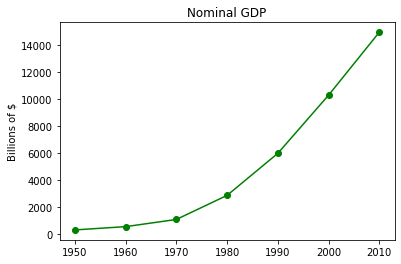

In [1]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

### Bar Charts

* A bar chart is a good choice when you want to show how some quantity varies among some *discrete* set of items

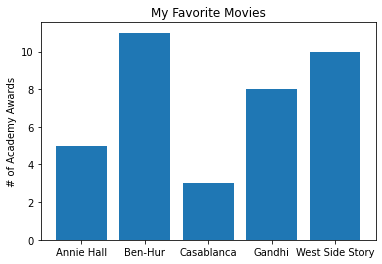

In [2]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies")
plt.ylabel("# of Academy Awards")

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()

* can also be useful for plotting histograms of bucketed numeric values, and exploring how the values are *distributed*

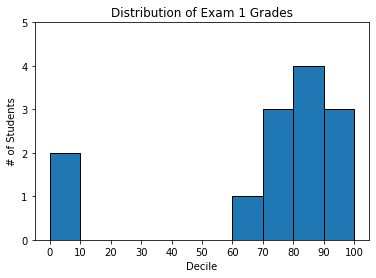

In [4]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor = (0, 0, 0))              # Black edges for each bar

plt.axis([-5, 105, 0 ,5])                   # x-axis from -5 to 105,
                                            # y-axis from 0 to 5
    
plt.xticks([10 * i for i in range(11)])     # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

Be judicious when using **plt.axis**. It is considered bad form for your y-axis not to start at 0, since this is an easy way to mislead people

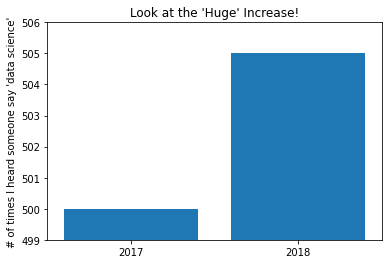

In [5]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

* if we use more sensible axes, it looks far less impressive

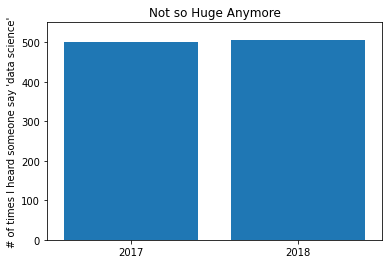

In [7]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

plt.ticklabel_format(useOffset=False)

plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not so Huge Anymore")
plt.show()

### Line Charts

line charts are good for showing *trends*

In [8]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

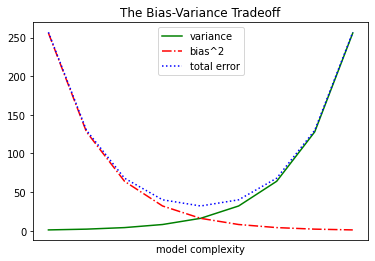

In [10]:
# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')     # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')       # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error')  # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

### Scatterplots

A scatterplot is the right choice for visualizing the relationship between two paired sets of data. For example, the relationship between the number of friends your users have and the number of minutes they spend on the site every day

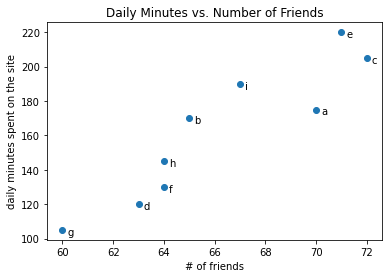

In [11]:
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels  = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 xy=(friend_count, minute_count), # Put the label with its point
                 xytext=(5, -5),                  # but slightly offset
                 textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

If you're scattering comparable variables, you might get a misleading picture if you let matplotlib choose the scale

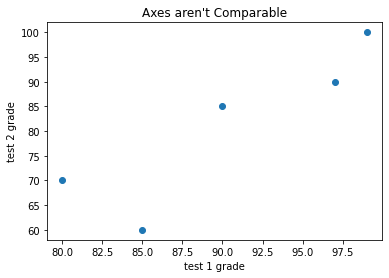

In [12]:
test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

* a call to **plt.axis("equal")** can help fix this

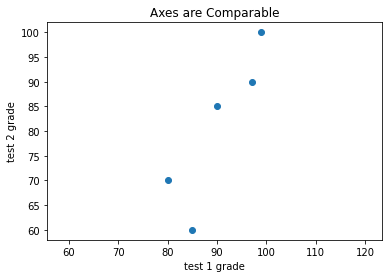

In [13]:
test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.axis("equal")
plt.title("Axes are Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

* now more accurately shows the variation mostly occurs on test 2